In [686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [702]:
def plotresult(theta=False,sizemat=100):
    data_max = np.max(x,axis=0)
    data_min = np.min(x,axis=0)
    feature_x = np.linspace(data_min[0], data_max[0], sizemat)
    feature_y = np.linspace(data_min[1], data_max[1], sizemat)
    [X,Y] = np.meshgrid(feature_x,feature_y)
    _, ax = plt.subplots(1, 1)
    if np.any(theta):
        val_map = X*0
        for i in range(sizemat):
            for j in range(sizemat):
                val_map[i,j] = predict(theta,feature_x[i],feature_y[j])
        
        # plots contour lines
        ax.contour(X, Y, val_map>0.5)
        ax.set_title('Contour Plot')
    plt.scatter(x[:,0][data[:,-1]==1],x[:,1][data[:,-1]==1],marker='+',c='blue')
    plt.scatter(x[:,0][data[:,-1]==0],x[:,1][data[:,-1]==0],marker='o',c='yellow',edgecolors='black')
    ax.legend(['y=1','y=0'],loc=1)
    ax.set_xlabel('Microchip Test 1')
    ax.set_ylabel('Microchip Test 2')
    
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def cost(theta_val, x_val, y_val,lambd=0):
    count = y_val.shape[0]
    theta_val = theta_val.reshape((-1,1))
    h = sigmoid(theta_val.T @ x_val.T).T
    pos_cost = - y_val * np.log(h)
    neg_cost = - (1-y_val) * np.log(1-h)
    theta_x = np.array([i for i in theta_val.flatten()])
    theta_x[0] = 0
    cost_p1 = np.sum(pos_cost + neg_cost)/count
    cost_p2 = lambd/(2*count) * np.sum(theta_x**2)
    return np.array(cost_p1+cost_p2).reshape((1,1))

def grad_cost(theta_val, x_val, y_val,lambd=0):
    count = y_val.shape[0]
    theta_val = theta_val.reshape((-1,1))
    err = sigmoid(theta_val.T @ x_val.T).T-y_val
    theta_x = np.array([i for i in theta_val.flatten()])
    theta_x[0] = 0
    return ((x_val.T @ err)/count).flatten() + (lambd/count) * theta_x

def grad_cost_old(theta_val, x_val, y_val):
    theta_val = theta_val.reshape((-1,1))
    err = sigmoid(theta_val.T @ x_val.T).T-y_val
    count = y_val.shape[0]
    return ((x_val.T @ err)/count).flatten()

def predict(theta_val,x_val,y):
    theta_val = theta_val.reshape((-1,1))
    res = sigmoid(theta_val.T @ x_val.T).T
    return res.flatten()
    
def x_arr(x1_val,x2_val):
    if type(x1_val) == int or type(x1_val) == np.float64 or type(x1_val) == float:
        x_a = 1
    else:
        if len(x1_val) != len(x2_val):
            return None
        x_a = [1]*len(x1_val)
    degree = 6
    for i in range(1,degree+1):
        for j in range(i+1):
            x_a = np.c_[x_a, (x1_val**(i-j))*(x2_val**j)]
    return x_a

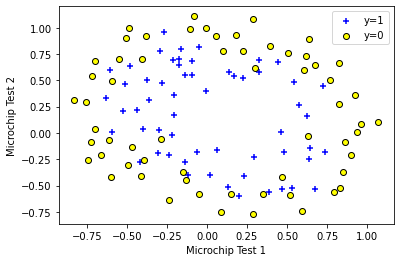

In [688]:
data = pd.read_csv('ex2data2.txt').to_numpy()
x = data[:,:-1]
y = data[:,-1].reshape((-1,1))
x_a = x_arr(x[:,0],x[:,1])
plotresult()

# Using scipy.optimize (w/o regularization)

C:\Users\chand\AppData\Local\Temp/ipykernel_14424/3482232766.py:24: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-z)))


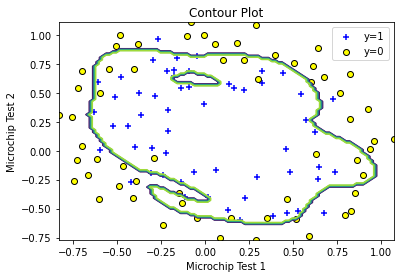

In [689]:
from scipy import optimize
theta0 = np.array([0]*28)

optimizer = optimize.minimize(fun=cost, x0=theta0,args = (x_a,y), method ='L-BFGS-B', jac=grad_cost)
theta0 = optimizer.x
plotresult(theta0)


# Using scipy.optimize (w/ regularization $\lambda$ =1)

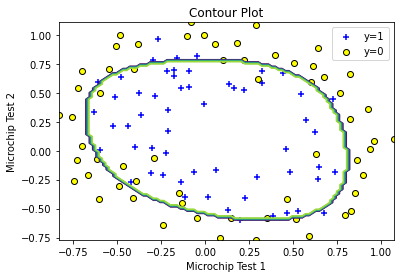

In [690]:
from scipy import optimize
theta1 = np.array([0]*28)
optimizer = optimize.minimize(fun=cost, x0=theta1,args = (x_a,y,1), method ='L-BFGS-B', jac=grad_cost)
theta1 = optimizer.x
plotresult(theta1)

# Using scipy.optimize (w/ regularization $\lambda$ = 10)

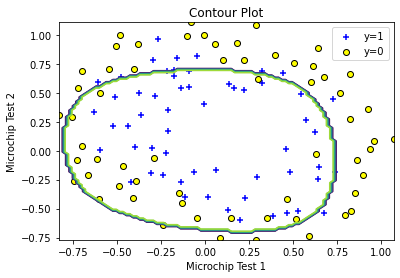

In [691]:
from scipy import optimize
theta2 = np.array([0]*28)
optimizer = optimize.minimize(fun=cost, x0=theta2,args = (x_a,y,10), method ='L-BFGS-B', jac=grad_cost)
theta2 = optimizer.x
plotresult(theta2)

# Manual Gradient Descent

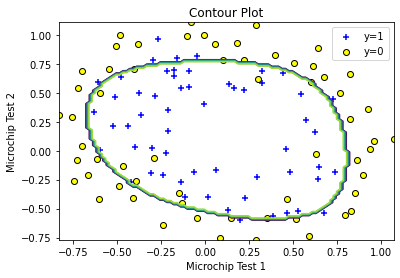

In [692]:
pretrained = True
if pretrained:
    loop = 1000
    theta3 = np.array([1.37120319e+00,7.58285047e-01,1.41957273e+00,-2.26493684e+00 \
                    ,-1.02674631e+00,-1.43762950e+00,1.337446960e-01,-3.96765021e-01 \
                    ,-4.13930889e-01,-2.38284815e-01,-1.75419429e+00,-9.40783833e-02 \
                    ,-6.87068789e-01,-3.05634417e-01,-1.41164688e+00,-3.20214390e-01 \
                    ,-2.49252235e-01,-7.53228908e-02,-3.07314586e-01,-3.32700663e-01 \
                    ,-6.61791355e-01,-1.29649747e+00,2.016405080e-03,-3.41831853e-01 \
                    ,4.27546043e-04,-3.74308571e-01,-1.57378026e-01,-1.21739763e+00])
else:
    loop = 1000000
    theta3 = np.array([0]*28)
gradient = 1e-3 
for _ in range(loop):
    loop_res = grad_cost(theta3,x_a,y)
    theta3 = theta3 - (gradient * loop_res)
plotresult(theta3)

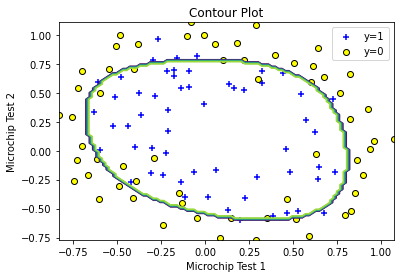

In [693]:
import sklearn.linear_model
clf = sklearn.linear_model.LogisticRegression()
clf.fit(x_a[:,1:], y.reshape((-1,)))
w0 = clf.intercept_.reshape(1,)
thetax = clf.coef_.flatten()
theta4 = (np.r_[w0,thetax]).reshape((-1,1))
plotresult(theta4)

In [718]:
acc0 = np.mean(1-np.abs((predict(theta0,x_a,y)>0.5)-y.flatten()))
acc1 = np.mean(1-np.abs((predict(theta1,x_a,y)>0.5)-y.flatten()))
acc2 = np.mean(1-np.abs((predict(theta2,x_a,y)>0.5)-y.flatten()))
acc3 = np.mean(1-np.abs((predict(theta3,x_a,y)>0.5)-y.flatten()))
acc4 = np.mean(1-np.abs((predict(theta4,x_a,y)>0.5)-y.flatten()))
print(f'theta0 accuracy : {acc0*100:.2f} %')
print(f'theta1 accuracy : {acc1*100:.2f} %')
print(f'theta2 accuracy : {acc2*100:.2f} %')
print(f'theta3 accuracy : {acc3*100:.2f} %')
print(f'theta4 accuracy : {acc4*100:.2f} %')

Accuracy :
theta0 accuracy : 89.74 %
theta1 accuracy : 82.91 %
theta2 accuracy : 75.21 %
theta3 accuracy : 82.05 %
theta4 accuracy : 82.91 %
